# EDA

### import the library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
data = pd.read_csv('train.csv')

### Analyse de forme

In [3]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# nombre ligne et col
data.shape

(1460, 81)

In [5]:
# type des variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## SalePrice variable target
# type des variables
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
# type des variables
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

### on a plusieurs variable qualitative 

<AxesSubplot:>

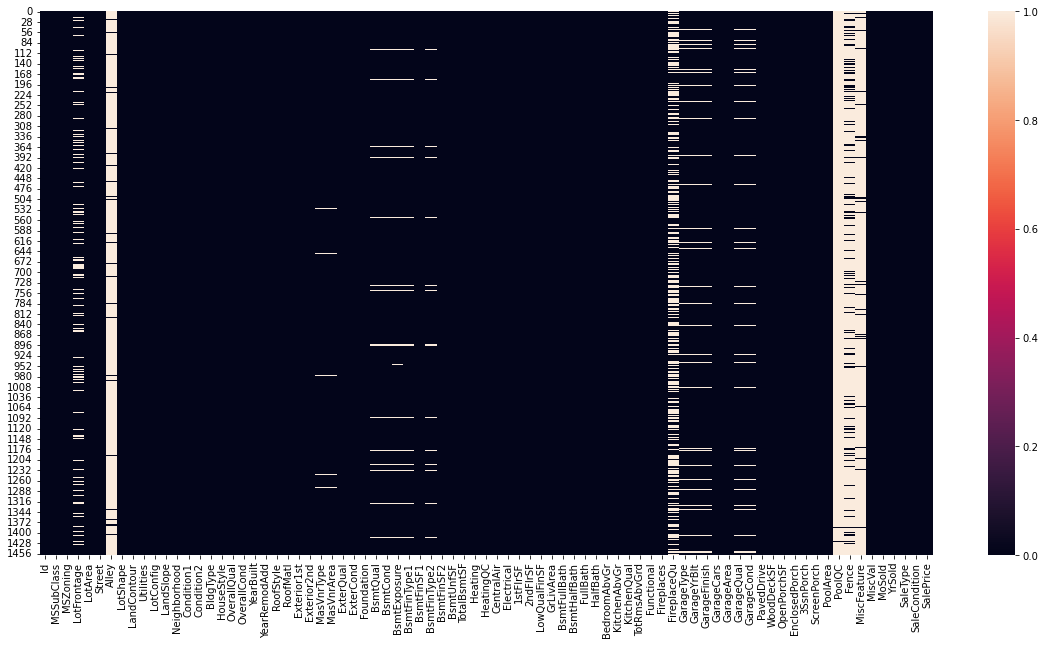

In [8]:
# analyse des valeurs manquantes
plt.figure(figsize=(20, 10))
sns.heatmap(data.isna())

In [9]:
(data.isna().sum() / data.shape[0]).sort_values()

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
                   ...   
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
Length: 81, dtype: float64

### Analyse de fond

In [10]:
data  = data[data.columns[data.isna().sum() / data.shape[0] < 0.9]]
len(data.columns)

78

In [11]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500


In [12]:
data = data.drop(columns='Id', axis=1)

In [13]:
data.shape

(1460, 77)

In [14]:
# visualisation de target
print(data['SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


e:\programmes\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

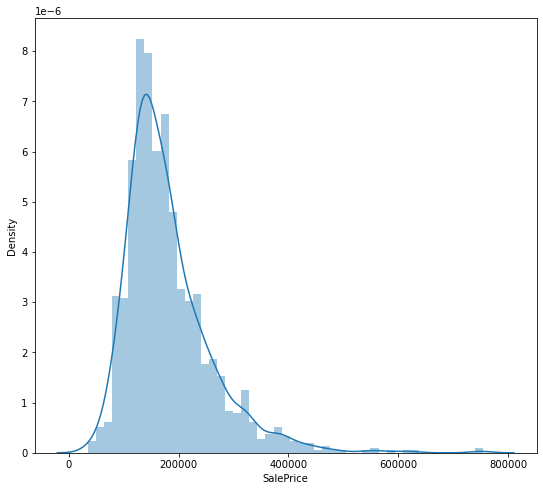

In [15]:
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'])

In [16]:
### Numerical data distribution
df_num = data.select_dtypes(include=['float64', 'int64'])

In [17]:
df_num.shape

(1460, 37)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

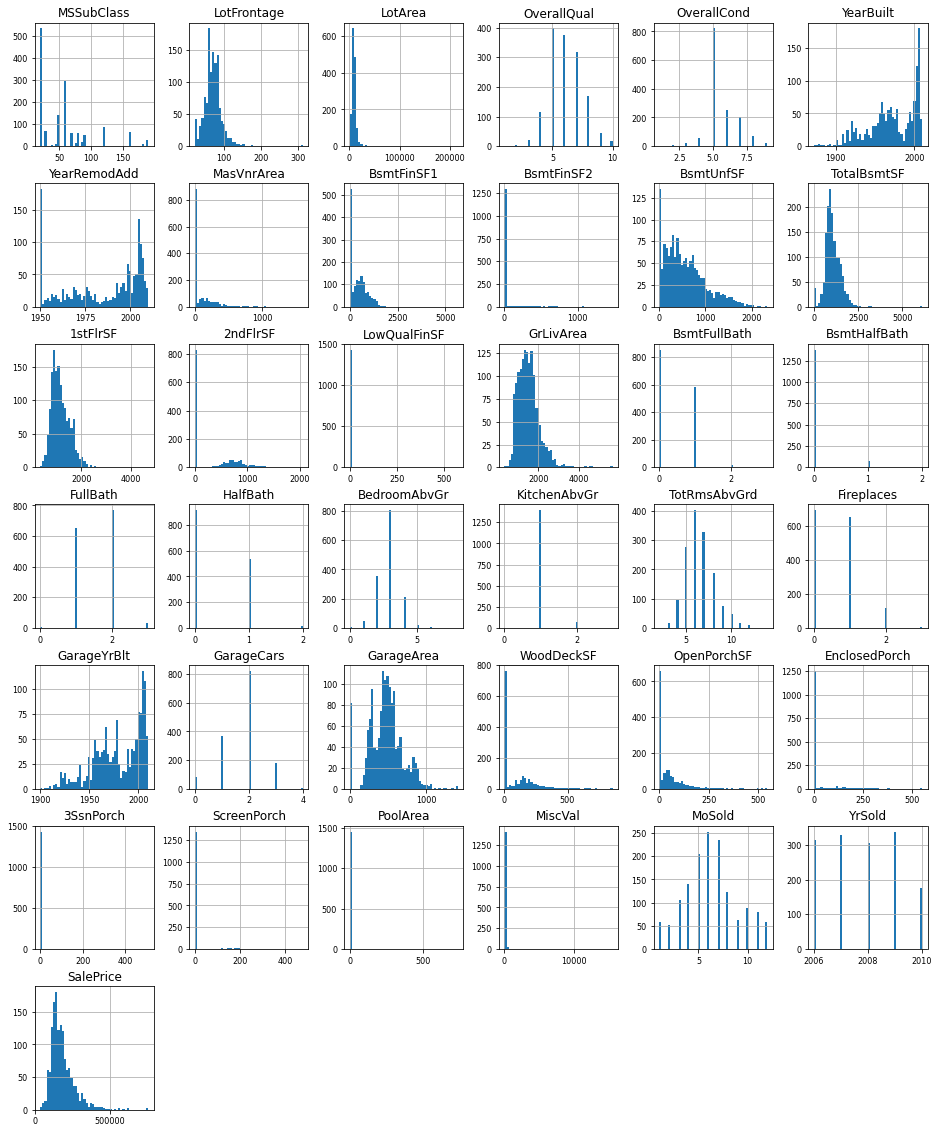

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [19]:
data.select_dtypes('object').shape

(1460, 40)

In [20]:
### variable qualitative
for col in data.select_dtypes('object'):
    print(f'{col :-<30} {data[col].unique()}')

MSZoning---------------------- ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street------------------------ ['Pave' 'Grvl']
LotShape---------------------- ['Reg' 'IR1' 'IR2' 'IR3']
LandContour------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities--------------------- ['AllPub' 'NoSeWa']
LotConfig--------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope--------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood------------------ ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1-------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2-------------------- ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType---------------------- ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle-------------------- ['2Story' '1Story' '1.5Fin'

### il y a quelques variables avec les champs sont presques semblables
à voir s'il y a des différences sur ces champs
Condition1, Condition2
GarageQual, GarageCond
BsmtFinType1
BsmtFinType2
BsmtQual
BsmtCond
ExterQual
ExterCond
Exterior2nd
Exterior1st

In [21]:
def plot2pie(first, second):
    plt.figure()
    plt.title(first + '-' + second)
    plt.legend(first + '-' + second)
    data[first].value_counts().plot.pie()
    plt.figure()
    data[second].value_counts().plot.pie()

In [22]:
s_columns = [
    ("Condition1", "Condition2"),
    ("GarageQual", "GarageCond"),
    ("BsmtFinType1", "BsmtFinType2"),
    ("BsmtQual", "BsmtCond"),
    ("ExterQual", "ExterCond"),
    ("Exterior2nd", "Exterior1st"),
]

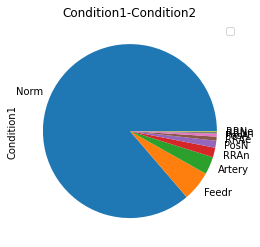

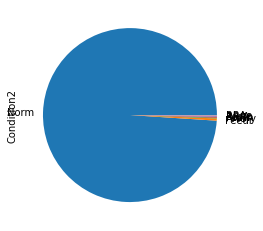

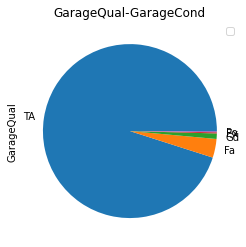

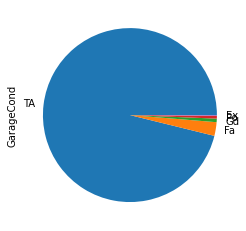

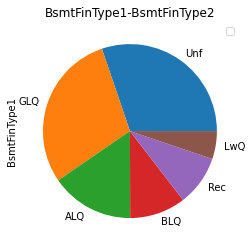

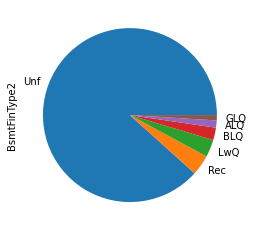

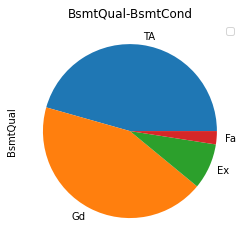

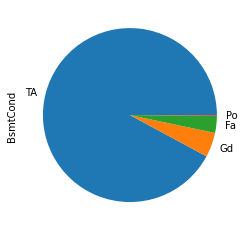

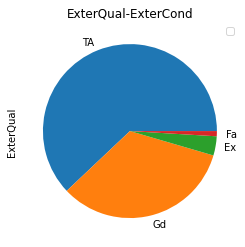

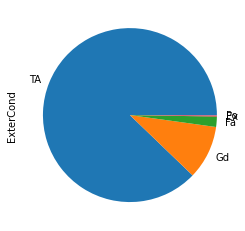

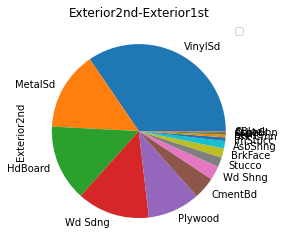

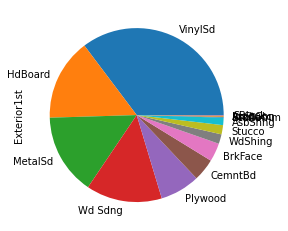

In [23]:
for col in s_columns:
    plot2pie(col[0], col[1])

* Exterior2nd et Exterior1st 
la repartition est presque sembable
* Condition1 et Condition2: même description
la plupart de Condition2 est norm, on garde Condition1 
* GarageQual et GarageCond
la repartition est presque sembable


<AxesSubplot:>

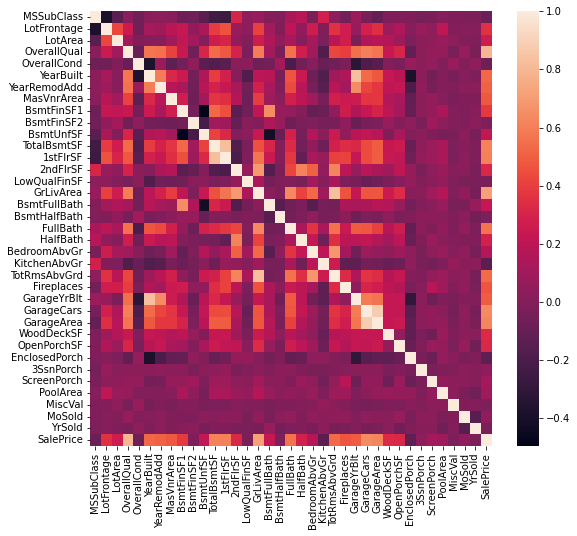

In [24]:
# visualization de correlation entre les variables
plt.figure(figsize=(9, 8))
sns.heatmap(data.corr())

## Preprocessing

In [25]:
# split Train / Test
# encodage
# Nettoyage des Nan
df = data.copy()
encoder = LabelEncoder()

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [27]:
df.columns.shape

(77,)

In [28]:
df = df.drop(columns=['Condition2'])

In [29]:
def checkDiff(col1, col2):
    first = np.array(encoder.fit_transform(df[col1]))
    second = np.array(encoder.fit_transform(df[col2]))
    item = first - second
    counter = 0
    for i in item:
        if(i != 0):
            counter += 1
    print('counter', counter)

In [30]:
s_columns = [
    ("Condition1", "Condition2"),
    ("GarageQual", "GarageCond"),
    ("BsmtFinType1", "BsmtFinType2"),
    ("BsmtQual", "BsmtCond"),
    ("ExterQual", "ExterCond"),
    ("Exterior2nd", "Exterior1st"),
]

In [31]:
checkDiff("Exterior2nd", "Exterior1st")

counter 945


<AxesSubplot:>

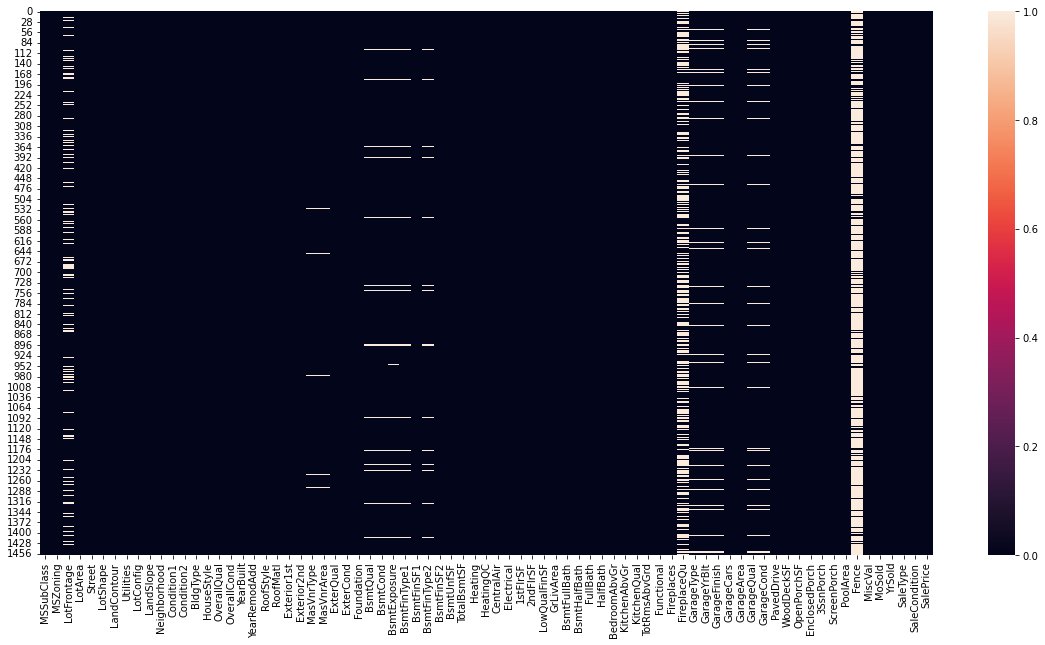

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.isna())

In [33]:
bsmtCol=["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]

In [34]:
df = df.drop(columns=bsmtCol)

<AxesSubplot:>

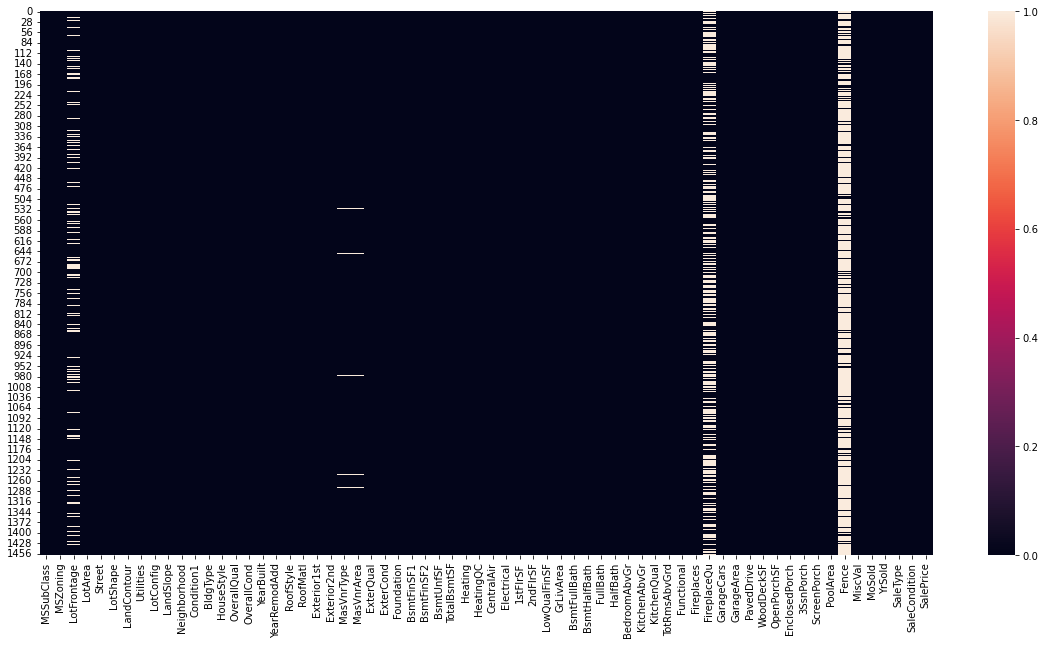

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna())

In [36]:
def encodage(df):
    for col in df.select_dtypes('object'):
        df[col] = encoder.fit_transform(df[col])
    return df


In [37]:
def imputation(df):
    return df.dropna()

In [38]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    print('df shape', df.shape)
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    return X, y

In [39]:
trainset, valset = train_test_split(df, test_size=0.2, random_state=0)

In [40]:
## modifier le dataset pour lutter contre l'overfitting

In [41]:
# underfitting => polynomialFeatures, feature Engineering, modèle plus complexe
# overfitting => imputation / fillna, SelectFromModel, Régularisation
x_train, y_train = preprocessing(trainset)

df shape (951, 66)


In [42]:
x_val, y_val = preprocessing(valset)

df shape (244, 66)


# Modelisation

In [43]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline

In [55]:
# check xgboost version
import xgboost
print(xgboost.__version__)

2.1.1


In [58]:
random_params = {
    "n_estimators": 75,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 0,
}

In [46]:
rand_model = RandomForestRegressor(**random_params)

# évaluation

In [140]:
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


In [49]:
def evaluation(model):
    k = np.array([25,50,75,100])
    model.fit(x_train, y_train)
    ypred = model.predict(x_val)
    print('RMSE --> ', mean_squared_error(y_val, ypred, squared=False))
    # train_score, val_score = validation_curve(model, x_train, y_train, param_name='n_estimators', param_range=k, cv=4)
    N, train_score, val_score = learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    # score = r2_score(y_val, ypred)
    # print('accuracy_score: ', score)
    plt.figure(figsize=(5, 5))
    plt.plot(N, train_score.mean(axis=1), label = 'train score')
    plt.plot(N, val_score.mean(axis=1), label = 'val score')
    plt.legend()

RMSE -->  34974.1004488028


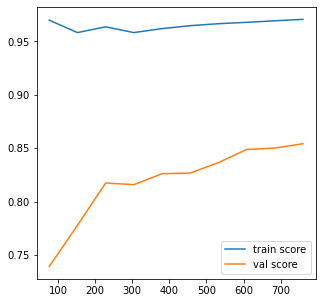

In [51]:
evaluation(rand_model)

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

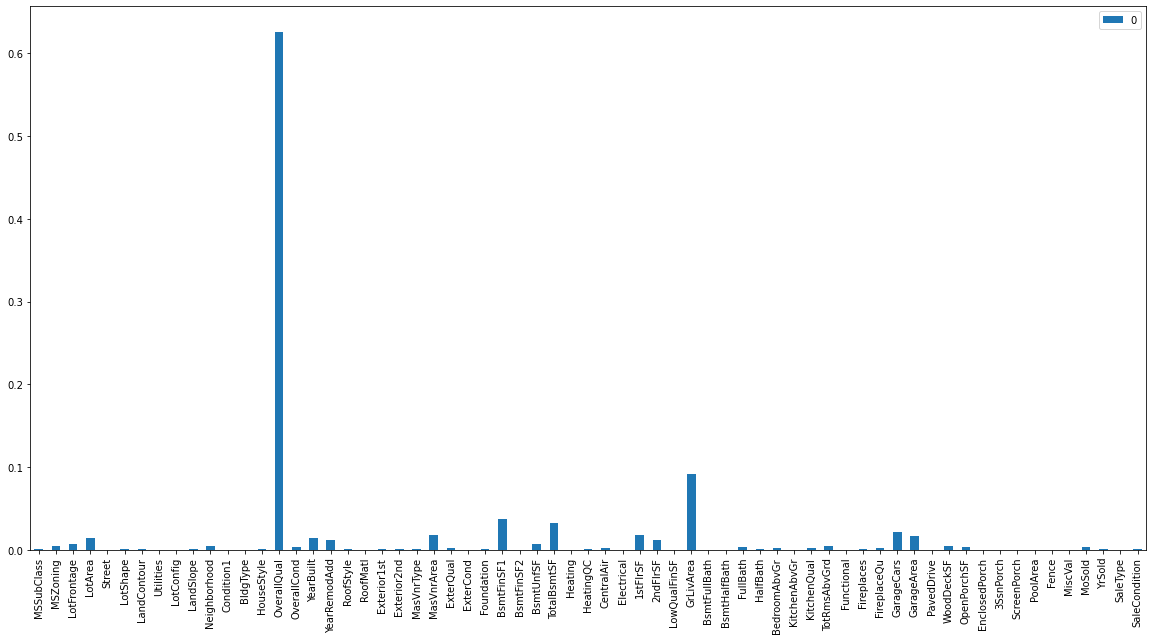

In [53]:
plt.figure(figsize=(10,10))
pd.DataFrame(rand_model.feature_importances_, index=x_train.columns).plot.bar(figsize=(20,10))

RMSE -->  32138.09660965048


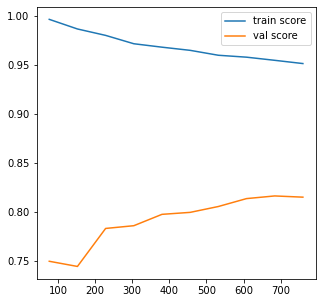

In [146]:
adab_params = {
    "n_estimators": 75,
    # "min_samples_split": 5,
    # "warm_start":True,
    # "oob_score":True,
    # "random_state": 0,
    "loss": 'square', #exponential square linear,
    "learning_rate": 0.2
}
adabRegr = AdaBoostRegressor(**adab_params, base_estimator=DecisionTreeRegressor(max_depth=5))
evaluation(adabRegr)

In [143]:
# n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8
xgb_params = {
    "n_estimators": 100,
    "max_depth": 2,
    "eta": 0.02,
    "subsample": 0.9, 
    "colsample_bytree": 0.9,
    "min_child_weight": 5
}

In [144]:
xbg_model = xgboost.XGBRegressor(**xgb_params)

RMSE -->  43365.64879781562


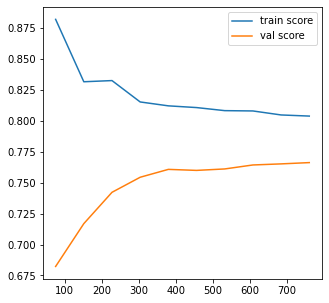

In [145]:
evaluation(xbg_model)

## avec XGBoost, l'écart entre le score d'entraînement et le score de validation est réduit.
Le modèle est capable de généraliser, il n'a pas overfit

## OPTIMISATION

In [147]:
from sklearn.model_selection import GridSearchCV

In [153]:
hyper_params = {
    "n_estimators": [50, 70, 100, 150],
    "max_depth": [1 ,2, 3, 4],
    "eta": [0.02, 0.05, 0.07],
    "min_child_weight": [5, 8, 10],
     "subsample": [0.5, 0.8, 0.9],
    "colsample_bytree": [0.5, 0.8, 0.9],
}

In [154]:
grid = GridSearchCV(xbg_model, hyper_params, cv=4)

In [155]:
grid.fit(x_train, y_train)
print(grid.best_params_)

{'colsample_bytree': 0.5, 'eta': 0.05, 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 100, 'subsample': 0.5}


RMSE -->  35717.26280318381


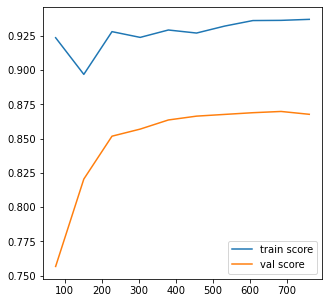

In [156]:
evaluation(grid.best_estimator_)